In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os

# Handwriting recognition using my own handwriting and OpenCV

## Helper function for displaying the images

In [5]:
def show_grayscale_img(img, title = ''):
    plt.figure(figsize = (10,15));
    plt.title(title)
    plt.imshow(img, cmap='gray')

## Loading the pictures and transforming them to MNIST format

digit4.png
digit5.png
digit7.png
digit6.png
digit2.png
digit3.png
digit1.png
digit0.png
digit8.png
digit9.png


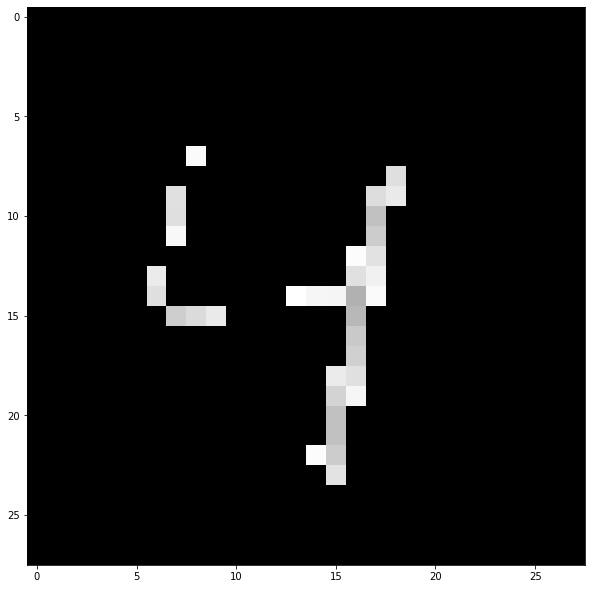

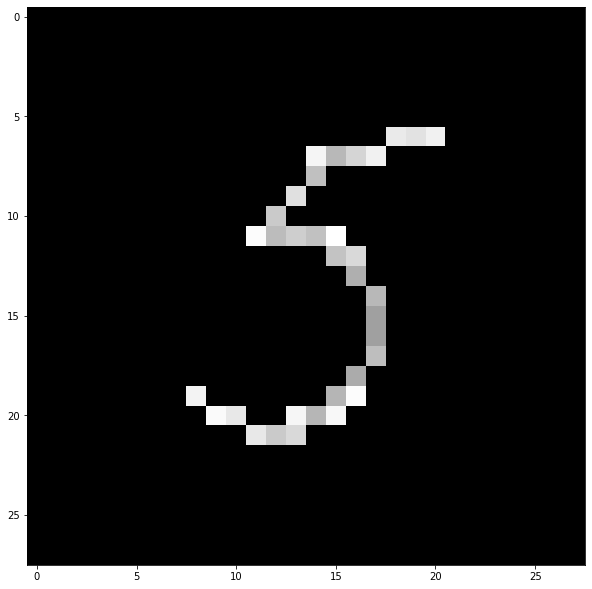

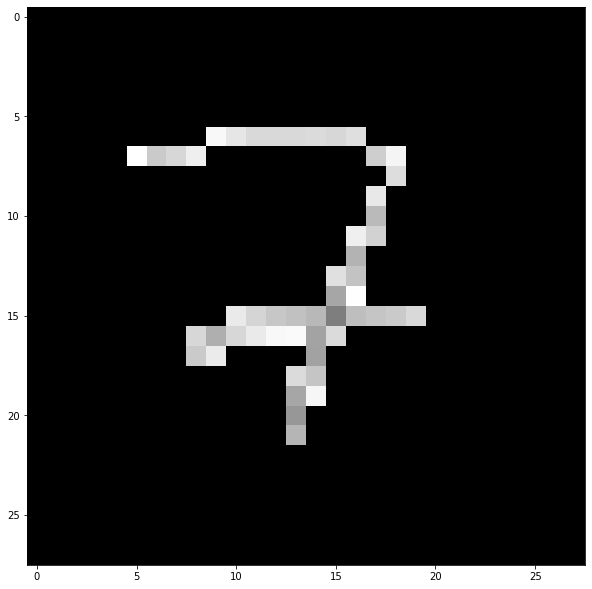

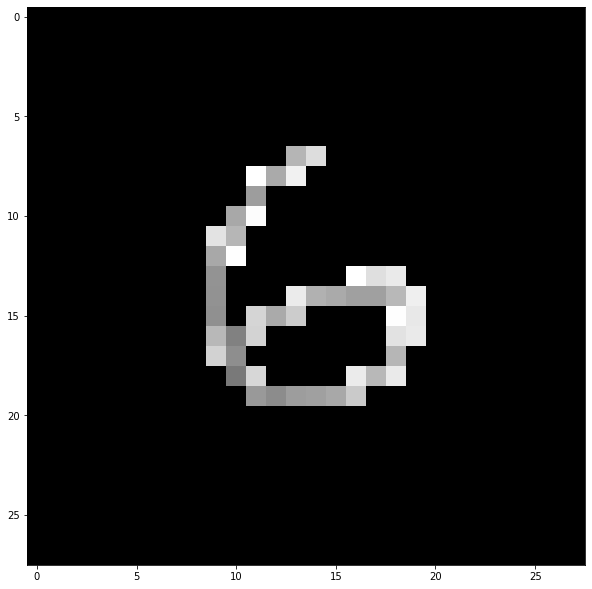

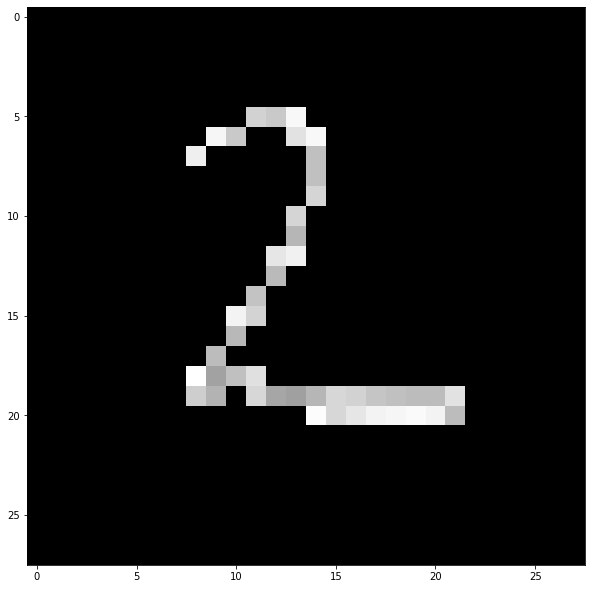

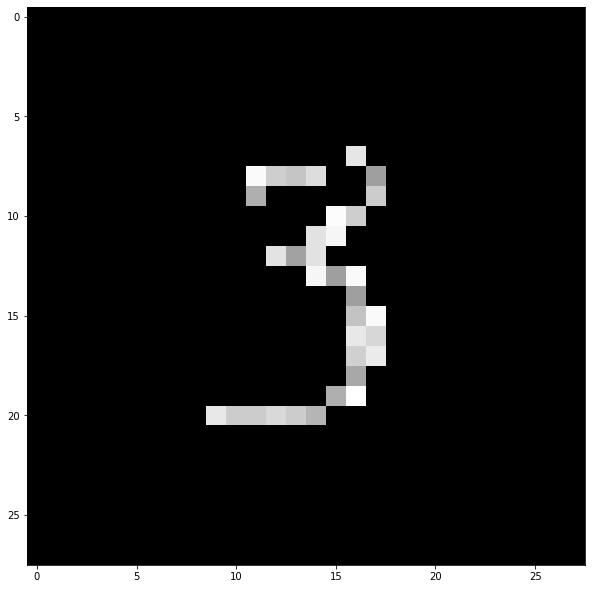

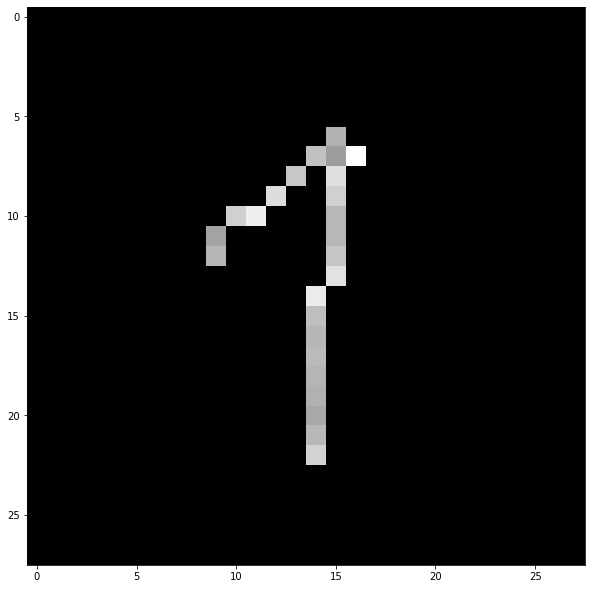

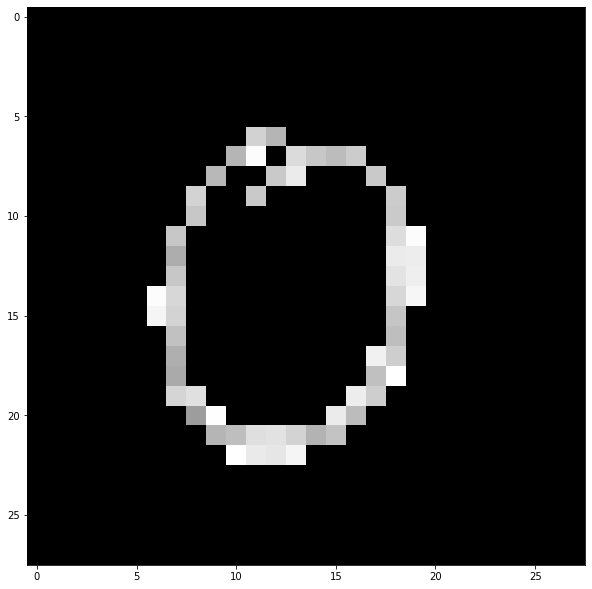

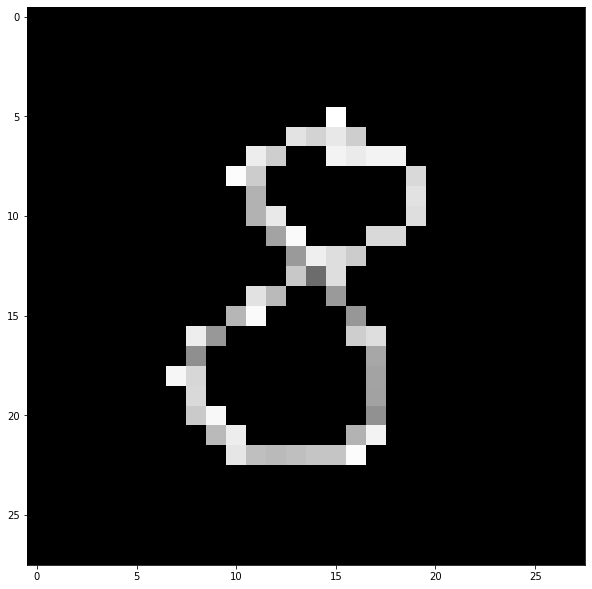

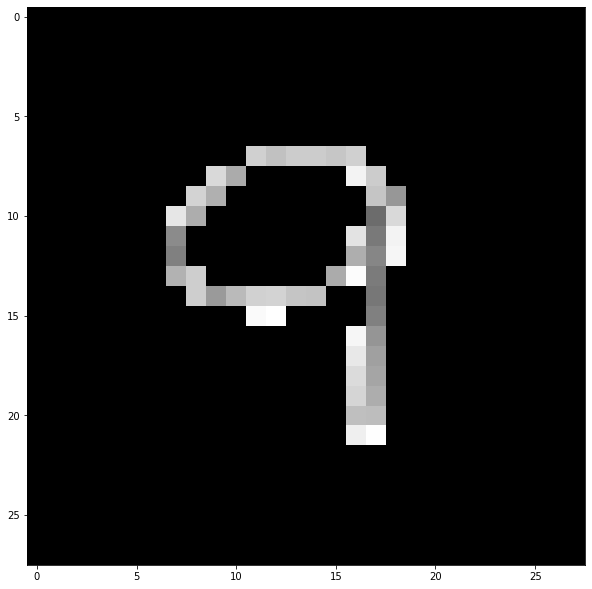

In [71]:
threshold = 140
max_value = 255

img_arr = []
dig_arr = []
for idx, filename in enumerate(os.listdir('img/digits_cropped')):
    print(filename)
    img = cv2.imread('img/digits_cropped/' + filename)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_resized = cv2.resize(img_gray, (28,28), interpolation=cv2.INTER_AREA)
    
    ret, thresh_binary_inverted = cv2.threshold(img_resized, threshold, max_value, cv2.THRESH_TOZERO_INV)
    show_grayscale_img(thresh_binary_inverted)
    dig_arr.append(filename[5:6])
    img_arr.append(thresh_binary_inverted)


## Training a CNN with the MNIST dataset

In [18]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 1

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 132s 2ms/step - loss: 0.2740 - acc: 0.9152 - val_loss: 0.0614 - val_acc: 0.9811
Test loss: 0.06136475581526756
Test accuracy: 0.9811


In [29]:
x_test[0].shape


(28, 28, 1)

In [79]:
reshaped = []
for num in img_arr:
    
    reshaped.append(np.reshape(num, (28, 28, 1)))
    
np_reshaped = np.array(reshaped)

predictions = model.predict(np_reshaped)
for predicted, real in zip(predictions, dig_arr):
    print(f"Predicted value is: {np.argmax(predicted)}, real value is: {real}")
    

Predicted value is: 4, real value is: 4
Predicted value is: 5, real value is: 5
Predicted value is: 7, real value is: 7
Predicted value is: 6, real value is: 6
Predicted value is: 2, real value is: 2
Predicted value is: 3, real value is: 3
Predicted value is: 1, real value is: 1
Predicted value is: 0, real value is: 0
Predicted value is: 8, real value is: 8
Predicted value is: 9, real value is: 9
